In [ ]:
!pip install konlpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### (1) 데이터 로드 및 확인

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 스시란_전처리.csv to 스시란_전처리.csv


In [ ]:
review = pd.read_csv('스시란_전처리.csv', sep = ',')
review

,Unnamed: 0,category,store,id,review_spell_check,star
0,0,일식,스시란-안양점,li**님,시간 내에 배달 왔어요 맛있게 먹겠습니다 사장님 김치는 상태 점검하셔야 할거 같아요,5
1,1,일식,스시란-안양점,tk**님,사장님 매번 잘 먹었는데 어제는 약간 아쉬웠어요 하지만 다음에 또 뵈어요,5
2,2,일식,스시란-안양점,tn**님,믿고 먹는 스시란,5
3,3,일식,스시란-안양점,he**님,사실 밤늦게 배고픈데 기름진 건 먹기 싫고 그래서 처음으로 주문해봤는데 양이 진짜 ...,5
4,4,일식,스시란-안양점,du**님,너무 맛있게 잘 먹었습니다,5
...,...,...,...,...,...,...
2623,2734,일식,스시란-안양점,gd**님,개인적으로 회덮밥은 회가 너무 적었어요나가사키 짬뽕은 불 맛이 좀 약한 거 같았는데...,2
2624,2735,일식,스시란-안양점,jj**님,리뷰 한 번도 안 썼는데 메모 보고 기분 좋게 잘 먹었습니다 녹차도 감사히 먹겠습니...,5
2625,2736,일식,스시란-안양점,wk**님,금요일 저녁 뭐 먹을 게 있나 요기요를 켰는데 새로 생겼길래 시켰습니다 잘 시킨 거...,5
2626,2737,일식,스시란-안양점,jo**님,싱싱하니 맛나요 소고기 초밥 강추 간장 새우 장어초밥 짱,5


- 결측치 확인 및 추가 제거

In [ ]:
review.isnull().sum() # NULL 값 유무 확인

Unnamed: 0             0
category               0
store                  0
id                     0
review_spell_check    10
star                   0
dtype: int64

In [ ]:
review = review.dropna(axis=0) # NULL 값이 있는 행 제거
print(review.isnull().sum()) # NULL 값 유무 재확인

Unnamed: 0            0
category              0
store                 0
id                    0
review_spell_check    0
star                  0
dtype: int64


In [ ]:
# 데이터 확인
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2618 entries, 0 to 2627
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2618 non-null   int64 
 1   category            2618 non-null   object
 2   store               2618 non-null   object
 3   id                  2618 non-null   object
 4   review_spell_check  2618 non-null   object
 5   star                2618 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 143.2+ KB


### (2) 한국어 텍스트 처리

In [ ]:
# 분석에 필요한 변수만 불러오기
review_data = review.loc[:, ["review_spell_check", "star"]]
review_data

,review_spell_check,star
0,시간 내에 배달 왔어요 맛있게 먹겠습니다 사장님 김치는 상태 점검하셔야 할거 같아요,5
1,사장님 매번 잘 먹었는데 어제는 약간 아쉬웠어요 하지만 다음에 또 뵈어요,5
2,믿고 먹는 스시란,5
3,사실 밤늦게 배고픈데 기름진 건 먹기 싫고 그래서 처음으로 주문해봤는데 양이 진짜 ...,5
4,너무 맛있게 잘 먹었습니다,5
...,...,...
2623,개인적으로 회덮밥은 회가 너무 적었어요나가사키 짬뽕은 불 맛이 좀 약한 거 같았는데...,2
2624,리뷰 한 번도 안 썼는데 메모 보고 기분 좋게 잘 먹었습니다 녹차도 감사히 먹겠습니...,5
2625,금요일 저녁 뭐 먹을 게 있나 요기요를 켰는데 새로 생겼길래 시켰습니다 잘 시킨 거...,5
2626,싱싱하니 맛나요 소고기 초밥 강추 간장 새우 장어초밥 짱,5


In [ ]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2618 entries, 0 to 2627
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_spell_check  2618 non-null   object
 1   star                2618 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 61.4+ KB


In [ ]:
# 정규 표현식 함수 정의
import re

def apply_regular_expression(review_spell_check):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1개)를 포함한 한글
    result = hangul.sub('', review_spell_check)  # 위에 설정한 "hangul"규칙을 "review_spell_check"에 적용(.sub)시킴
    return result

In [ ]:
apply_regular_expression(review_data['review_spell_check'][118]) # 확인

'늘 맛있게 먹고 있어요'

- 형태소 분석 - 명사 단위

In [ ]:
# 형태소 분석에 필요한 라이브러리 Konlpy
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from collections import Counter

# 명사 형태소 추출 함수
okt = Okt()
kkma = Kkma()
hannanum = Hannanum()

In [ ]:
# okt 채택
nouns = okt.nouns(apply_regular_expression(review_data['review_spell_check'][118]))
nouns

['늘']

In [ ]:
nouns2 = kkma.nouns(apply_regular_expression(review_data['review_spell_check'][118]))
nouns2

[]

In [ ]:
nouns3 = hannanum.nouns(apply_regular_expression(review_data['review_spell_check'][118]))
nouns3

[]

In [ ]:
# 말뭉치 생성
corpus = "".join(review_data['review_spell_check'].tolist())
corpus

'시간 내에 배달 왔어요 맛있게 먹겠습니다 사장님 김치는 상태 점검하셔야 할거 같아요사장님 매번 잘 먹었는데 어제는 약간 아쉬웠어요 하지만 다음에 또 뵈어요믿고 먹는 스시란사실 밤늦게 배고픈데 기름진 건 먹기 싫고 그래서 처음으로 주문해봤는데 양이 진짜 많더라고요 짱 포장도 이중으로 해주셔서 새 거나 흘리지 않았던 것 같아요 동생은 몇 번 여기서 먹어봤는데 초밥이 맛있다고 해서 나중엔 꼭 초밥 시켜 먹어볼게요너무 맛있게 잘 먹었습니다진짜 너무 맛있었습니다 번창하세요기사분이 문자를 안 주셔서 언제 놓고 갔는지 모르겠어요  맛은 그냥 그랬어요잘 먹었습니다 지난번에 한번 시켜 먹고 생각나서 또 시켰어요  서비스도 감사합니다깔끔하게 포장되어서 오고 맛있었습니다 배달도 빨리 왔어요항상 믿고 시킵니다 맛있어요너무 맛있어요 감사합니다가락국수랑 같이 시켰는데 배달이 너무 늦게 와서 회가 익었네요 이게 대체 뭘까요 진짜깔끔하고 배달도 빠르네요 최고양도 적당하고 회도 두껍고 아주 맛있었어요 초밥도 맛있고 1인 생선회도 너무 맛있고 좋아요항상 맛있게 먹고 있습니다  오늘은 소고기 초밥 고기가 더 길고 두꺼워서 대만족했어요 개인적으로 최애 초밥이라서 회도 두껍고 실하더라고요 샐러드 회 무침도 매번 너무 맛있어요 구성이 최고입니다 고민 중이신 분들은 꼭 주문해서 맛보세요마시어 용 회 무침 리뷰 신청했는데 회없는 야채무침이 왔어요 그래도 맛있어요기본 세트나 특선세트나 다 맛있네요 주신 죽도 맛있게 먹었습니다맛있게 잘 먹었습니다냉메밀이 먹고 싶어서 처음 주문해보았는데 남편이랑 너무 맛있어서 후딱 먹어버렸네요 너무 맛있게 잘 먹었습니다맛도 좋았고 양도 좋았습니다 잘 먹었어요예상시간보다 배달은 무지 빨리 왔어요 하지만 락 교통 열자마자 초파리 1마리 나왔어요 그리고 리뷰 이벤트 신청한 품목은 누락돼서 배달되지 않았어요 평점에 비해 이런저런 실망이 컸어요배달 빨라서 좋았는데 포장 뜯자마자 날파리가 나왔어요 배고파서 찝찝한 거 무시하고 그냥 먹었는데 개인적으로 밥이 싱겁고 소고기 초밥은 느끼했

In [ ]:
# 정규 표현식 적용
apply_regular_expression(corpus)

'시간 내에 배달 왔어요 맛있게 먹겠습니다 사장님 김치는 상태 점검하셔야 할거 같아요사장님 매번 잘 먹었는데 어제는 약간 아쉬웠어요 하지만 다음에 또 뵈어요믿고 먹는 스시란사실 밤늦게 배고픈데 기름진 건 먹기 싫고 그래서 처음으로 주문해봤는데 양이 진짜 많더라고요 짱 포장도 이중으로 해주셔서 새 거나 흘리지 않았던 것 같아요 동생은 몇 번 여기서 먹어봤는데 초밥이 맛있다고 해서 나중엔 꼭 초밥 시켜 먹어볼게요너무 맛있게 잘 먹었습니다진짜 너무 맛있었습니다 번창하세요기사분이 문자를 안 주셔서 언제 놓고 갔는지 모르겠어요  맛은 그냥 그랬어요잘 먹었습니다 지난번에 한번 시켜 먹고 생각나서 또 시켰어요  서비스도 감사합니다깔끔하게 포장되어서 오고 맛있었습니다 배달도 빨리 왔어요항상 믿고 시킵니다 맛있어요너무 맛있어요 감사합니다가락국수랑 같이 시켰는데 배달이 너무 늦게 와서 회가 익었네요 이게 대체 뭘까요 진짜깔끔하고 배달도 빠르네요 최고양도 적당하고 회도 두껍고 아주 맛있었어요 초밥도 맛있고 인 생선회도 너무 맛있고 좋아요항상 맛있게 먹고 있습니다  오늘은 소고기 초밥 고기가 더 길고 두꺼워서 대만족했어요 개인적으로 최애 초밥이라서 회도 두껍고 실하더라고요 샐러드 회 무침도 매번 너무 맛있어요 구성이 최고입니다 고민 중이신 분들은 꼭 주문해서 맛보세요마시어 용 회 무침 리뷰 신청했는데 회없는 야채무침이 왔어요 그래도 맛있어요기본 세트나 특선세트나 다 맛있네요 주신 죽도 맛있게 먹었습니다맛있게 잘 먹었습니다냉메밀이 먹고 싶어서 처음 주문해보았는데 남편이랑 너무 맛있어서 후딱 먹어버렸네요 너무 맛있게 잘 먹었습니다맛도 좋았고 양도 좋았습니다 잘 먹었어요예상시간보다 배달은 무지 빨리 왔어요 하지만 락 교통 열자마자 초파리 마리 나왔어요 그리고 리뷰 이벤트 신청한 품목은 누락돼서 배달되지 않았어요 평점에 비해 이런저런 실망이 컸어요배달 빨라서 좋았는데 포장 뜯자마자 날파리가 나왔어요 배고파서 찝찝한 거 무시하고 그냥 먹었는데 개인적으로 밥이 싱겁고 소고기 초밥은 느끼했어요

In [ ]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['시간', '내', '배달', '사장', '김치', '상태', '점검', '사장', '매번', '어제', '약간', '다음', '또', '스시', '란', '사실', '건', '먹기', '처음', '주문', '양', '진짜', '짱', '포장', '이중', '새', '거나', '것', '동생', '몇', '번', '여기', '초밥', '나중', '꼭', '초밥', '진짜', '번창', '기사', '문자', '안', '언제', '맛', '그냥', '지난번', '한번', '또', '서비스', '포장', '배달', '항상', '가락국수', '배달', '회', '이', '대체', '뭘', '진짜', '배달', '최고', '양도', '회도', '아주', '초밥', '인', '생선회', '항상', '오늘', '소고기', '초밥', '고기', '더', '개인', '최애', '초밥', '회도', '샐러드', '회', '매번', '구성', '최고', '고민', '중', '분', '꼭', '주문', '용', '회', '리뷰', '신청', '회', '야채', '기본', '세트', '특선', '세트', '주신', '죽도', '냉', '메밀', '처음', '주문', '남편', '맛', '양도', '예상', '시간', '배달', '무지', '락', '교통', '자마자', '초파리', '마리', '리뷰', '이벤트', '신청', '품목', '누락', '배달', '평점', '실망', '배달', '빨', '포장', '날', '파리', '거', '무시', '그냥', '개인', '밥', '소고기', '초밥', '리뷰', '평점', '기대', '만큼', '실망', '초밥', '초밥', '집', '여기저기', '주문', '쓰시', '란', '정착', '이제', '자연', '쓰시', '란', '배달', '맛', '서비스', '모', '초밥', '메뉴', '자기', '초밥', '개별', '구매', '끼', '것', '것', '오늘', '서비스', '다음', '음식', '종종', '초밥', '매우',

- 불용어 사전

In [ ]:
# 기본 불용어
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [ ]:
# 배달 리뷰에 필요없는 불용어 사전에 추가
review_stopwords = ['사진', '진짜' ,'여기', '식구', '그냥', '올해', '예상', '역시', '항상', '매번',
                    '계속', '시간', '정함', '수정', '아주', '혼자', '다음', '거의', '후기', '무슨',
                    '중간', '안산', '나름', '아저씨', '다시', '수고', '만약', '오늘', '살짝', '번창',
                    '예정', '분도', '다른', '런가', '고요', '아빠', '처음', '일식집', '보통']

for word in review_stopwords:
    stopwords.append(word)

- BoW(Bag of Words) 벡터 생성

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(reivew_spell_check):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', reivew_spell_check)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(review_data['review_spell_check'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [ ]:
# 단어 리스트 출력
word_list

['가게',
 '가격',
 '가기',
 '가까이',
 '가끔',
 '가능',
 '가득',
 '가라',
 '가락국',
 '가락국수',
 '가량',
 '가루',
 '가성',
 '가스',
 '가시',
 '가야',
 '가요제',
 '가운',
 '가운데',
 '가위',
 '가장',
 '가정',
 '가족',
 '가지',
 '가짓수',
 '가치',
 '각각',
 '각자',
 '간도',
 '간식',
 '간이',
 '간장',
 '간햑',
 '감격',
 '감기',
 '감동',
 '감사',
 '감사용',
 '감수',
 '감안',
 '감자',
 '감정',
 '감탄',
 '감탄사',
 '갑자기',
 '값어치',
 '강도',
 '강아지',
 '강조',
 '강추',
 '개도',
 '개별',
 '개봉',
 '개선',
 '개수',
 '개월',
 '개인',
 '개취',
 '거기',
 '거나',
 '거너',
 '거리',
 '거린데',
 '거만',
 '거실',
 '거임',
 '거조',
 '거지',
 '거초',
 '걱정',
 '건가',
 '건조',
 '검색',
 '게다가',
 '게살',
 '게실',
 '게유',
 '겠쥬',
 '겨를',
 '겨우',
 '격리',
 '격하',
 '결과',
 '결정',
 '결제',
 '경기',
 '경기도',
 '경우',
 '경험',
 '계란',
 '계란말이',
 '계좌',
 '고개',
 '고객',
 '고급',
 '고기',
 '고려',
 '고로',
 '고무',
 '고무줄',
 '고민',
 '고생',
 '고속',
 '고양이',
 '고오',
 '고정',
 '고지',
 '고추냉이',
 '고추장',
 '곧바로',
 '골로',
 '곳도',
 '곳임',
 '공부',
 '공사',
 '공지',
 '과정',
 '관련',
 '관리',
 '관장',
 '광어',
 '괜스레',
 '괜차낫어',
 '괜춘',
 '교죠묙녀셧항',
 '교통',
 '교통상황',
 '구루',
 '구리',
 '구매',
 '구성',
 '구성은',
 '구존',
 '구토',
 '국도',
 '국물',
 '국수',
 '군더더기',

In [ ]:
# 각 단어가 전체 리뷰중에 등장한 총 횟수
count_list

array([14, 52,  2, ...,  1,  2,  1])

In [ ]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
bow_vect.shape

(2618, 1478)

In [ ]:
# "단어" - "총 등장 횟수" Matching

word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가게': 14,
 '가격': 52,
 '가기': 2,
 '가까이': 1,
 '가끔': 14,
 '가능': 1,
 '가득': 4,
 '가라': 4,
 '가락국': 1,
 '가락국수': 28,
 '가량': 1,
 '가루': 2,
 '가성': 1,
 '가스': 2,
 '가시': 4,
 '가야': 1,
 '가요제': 1,
 '가운': 1,
 '가운데': 2,
 '가위': 1,
 '가장': 5,
 '가정': 1,
 '가족': 9,
 '가지': 9,
 '가짓수': 1,
 '가치': 1,
 '각각': 1,
 '각자': 1,
 '간도': 2,
 '간식': 1,
 '간이': 4,
 '간장': 37,
 '간햑': 1,
 '감격': 1,
 '감기': 1,
 '감동': 15,
 '감사': 14,
 '감사용': 2,
 '감수': 1,
 '감안': 3,
 '감자': 5,
 '감정': 1,
 '감탄': 1,
 '감탄사': 1,
 '갑자기': 12,
 '값어치': 1,
 '강도': 1,
 '강아지': 2,
 '강조': 1,
 '강추': 9,
 '개도': 1,
 '개별': 2,
 '개봉': 1,
 '개선': 4,
 '개수': 2,
 '개월': 1,
 '개인': 20,
 '개취': 1,
 '거기': 4,
 '거나': 2,
 '거너': 1,
 '거리': 10,
 '거린데': 1,
 '거만': 1,
 '거실': 1,
 '거임': 2,
 '거조': 1,
 '거지': 2,
 '거초': 1,
 '걱정': 13,
 '건가': 11,
 '건조': 1,
 '검색': 2,
 '게다가': 1,
 '게살': 1,
 '게실': 1,
 '게유': 1,
 '겠쥬': 1,
 '겨를': 1,
 '겨우': 2,
 '격리': 1,
 '격하': 1,
 '결과': 1,
 '결정': 1,
 '결제': 1,
 '경기': 1,
 '경기도': 1,
 '경우': 1,
 '경험': 1,
 '계란': 26,
 '계란말이': 1,
 '계좌': 1,
 '고개': 1,
 '고객': 2,
 '고급': 2,
 '고기': 29,
 '고려': 1,

- TF-IDF 변환

In [ ]:
#Bag of Words 벡터에 대해서 TF-IDF변환
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [ ]:
print(tf_idf_vect.shape)

(2618, 1478)


In [ ]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 1116)	0.6143939034097842
  (0, 639)	0.42769502941390797
  (0, 626)	0.36817168350331203
  (0, 531)	0.18266353417563813
  (0, 187)	0.5202698703714522


In [ ]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 1478)
[[0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# “벡터” - “단어” mapping
vect.vocabulary_

{'배달': 531,
 '사장': 626,
 '김치': 187,
 '상태': 639,
 '점검': 1116,
 '어제': 827,
 '약간': 798,
 '스시': 711,
 '사실': 618,
 '먹기': 432,
 '주문': 1163,
 '포장': 1371,
 '이중': 1008,
 '거나': 59,
 '동생': 324,
 '초밥': 1266,
 '나중': 206,
 '기사': 175,
 '문자': 478,
 '언제': 834,
 '지난번': 1187,
 '한번': 1401,
 '서비스': 658,
 '가락국수': 9,
 '대체': 294,
 '최고': 1274,
 '양도': 801,
 '회도': 1452,
 '생선회': 654,
 '소고기': 675,
 '고기': 95,
 '개인': 56,
 '최애': 1281,
 '샐러드': 649,
 '구성': 130,
 '고민': 100,
 '리뷰': 381,
 '신청': 746,
 '야채': 797,
 '기본': 173,
 '세트': 671,
 '특선': 1345,
 '주신': 1169,
 '죽도': 1174,
 '메밀': 440,
 '남편': 217,
 '무지': 471,
 '교통': 125,
 '자마자': 1055,
 '초파리': 1271,
 '마리': 387,
 '이벤트': 994,
 '품목': 1380,
 '누락': 245,
 '평점': 1368,
 '실망': 747,
 '파리': 1353,
 '무시': 468,
 '기대': 170,
 '만큼': 413,
 '여기저기': 848,
 '쓰시': 762,
 '정착': 1130,
 '이제': 1005,
 '자연': 1057,
 '메뉴': 437,
 '자기': 1053,
 '개별': 51,
 '구매': 129,
 '음식': 976,
 '종종': 1155,
 '매우': 424,
 '감안': 39,
 '부족함': 576,
 '무가': 465,
 '가격': 1,
 '정도': 1124,
 '고추냉이': 107,
 '고급': 94,
 '얼음': 838,
 '최악': 1280

In [ ]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{531: '배달', 626: '사장', 187: '김치', 639: '상태', 1116: '점검', 827: '어제', 798: '약간', 711: '스시', 618: '사실',...


### (3) Modeling - Logistic Regression

- Target Data 감성 라벨링

In [ ]:
review_data.head()

,review_spell_check,star
0,시간 내에 배달 왔어요 맛있게 먹겠습니다 사장님 김치는 상태 점검하셔야 할거 같아요,5
1,사장님 매번 잘 먹었는데 어제는 약간 아쉬웠어요 하지만 다음에 또 뵈어요,5
2,믿고 먹는 스시란,5
3,사실 밤늦게 배고픈데 기름진 건 먹기 싫고 그래서 처음으로 주문해봤는데 양이 진짜 ...,5
4,너무 맛있게 잘 먹었습니다,5


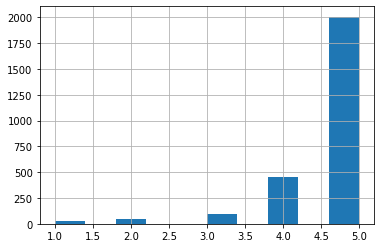

In [ ]:
# 별점 분포
review_data['star'].hist()
plt.show()

In [ ]:
# 별점별 리뷰 빈도
review_data["star"].value_counts()

5    2007
4     450
3      96
2      42
1      23
Name: star, dtype: int64

In [ ]:
# 별점 1~3개 : 부정
# 별점 4~5개 : 긍정
def star_to_label(star):
    if star > 3:
        return 1
    else:
        return 0
    
review_data['label'] = review_data['star'].apply(lambda x: star_to_label(x))

In [ ]:
review_data

,review_spell_check,star,label
0,시간 내에 배달 왔어요 맛있게 먹겠습니다 사장님 김치는 상태 점검하셔야 할거 같아요,5,1
1,사장님 매번 잘 먹었는데 어제는 약간 아쉬웠어요 하지만 다음에 또 뵈어요,5,1
2,믿고 먹는 스시란,5,1
3,사실 밤늦게 배고픈데 기름진 건 먹기 싫고 그래서 처음으로 주문해봤는데 양이 진짜 ...,5,1
4,너무 맛있게 잘 먹었습니다,5,1
...,...,...,...
2623,개인적으로 회덮밥은 회가 너무 적었어요나가사키 짬뽕은 불 맛이 좀 약한 거 같았는데...,2,0
2624,리뷰 한 번도 안 썼는데 메모 보고 기분 좋게 잘 먹었습니다 녹차도 감사히 먹겠습니...,5,1
2625,금요일 저녁 뭐 먹을 게 있나 요기요를 켰는데 새로 생겼길래 시켰습니다 잘 시킨 거...,5,1
2626,싱싱하니 맛나요 소고기 초밥 강추 간장 새우 장어초밥 짱,5,1


In [ ]:
# 감성별 리뷰 빈도
review_data["label"].value_counts()

1    2457
0     161
Name: label, dtype: int64

1    93.850267
0     6.149733
Name: label, dtype: float64


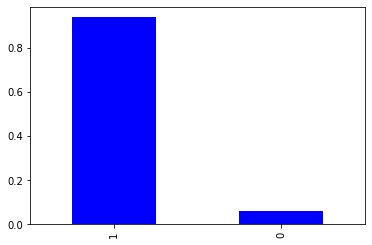

In [ ]:
# 긍정(1) & 부정(0) 비율
review_data["label"].value_counts(normalize=True).plot(kind='bar', color = "blue")
print(review_data["label"].value_counts(normalize=True)*100)

- train set & test set 분류

In [ ]:
# feature : tf_idf_vect(리뷰의 형태소와 중요도)
# target : label(별점에 따른 긍/부정)

from sklearn.model_selection import train_test_split

# 트레이닝 데이터, 테스트 데이터 설정
x = tf_idf_vect
y = review_data["label"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

# 현재 트레이닝 데이터 확인
print("Before Sampling: ",Counter(y_train))

Before Sampling:  Counter({1: 1722, 0: 110})


- 모델 학습(Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in train set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [ ]:
# 분류 결과 평가

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.94
precision: 0.94
recall: 1.00
F1: 0.97


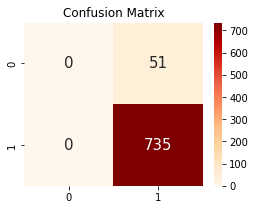

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

- 샘플링 재조정

In [ ]:
# 과적합(Overfitting)으로 인해 오버 샘플링(Over Sampling)
# OverSampling 방법 - SVMSMOTE

from imblearn.over_sampling import SVMSMOTE
SVMSMOTE = SVMSMOTE()
x_train_SVMSMOTE, y_train_SVMSMOTE = SVMSMOTE.fit_resample(x_train, y_train)
print("Before Sampling: ",Counter(y_train))
print("After oversampling(SVMSMOTE): ",Counter(y_train_SVMSMOTE))

Before Sampling:  Counter({1: 1722, 0: 110})
After oversampling(SVMSMOTE):  Counter({1: 1722, 0: 642})


- 모델 재학습

In [ ]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train_SVMSMOTE, y_train_SVMSMOTE)
y_pred = lr2.predict(x_test)

In [ ]:
# 분류 결과 평가

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.91
precision: 0.94
recall: 0.97
F1: 0.96


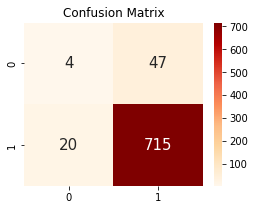

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

- 적절한 임계값(threshold) 찾기


In [ ]:
proba = lr2.predict_proba(x_test)
y_pred = lr2.predict(x_test)
print(len(y_pred))
print(len(proba))
print(len(proba[0]))

786
786
2


In [ ]:
# 임계값(threshold) 0.55로 설정할 경우

prediction = np.where(proba >= 0.55,1,0)
pred2 = []
for i in prediction:
    pred2.append(i[1])

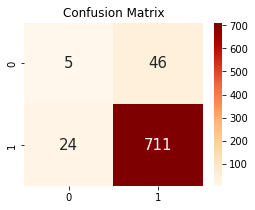

In [ ]:
# confusion matrix
confusion = confusion_matrix(y_true = y_test, y_pred = pred2)

plt.figure(figsize=(4, 3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('accuracy:',accuracy_score(y_test,pred2))
print('precision:',precision_score(y_test,pred2))
print('recall:',recall_score(y_test,pred2))
print('f1_score:',f1_score(y_test,pred2))

accuracy: 0.910941475826972
precision: 0.9392338177014531
recall: 0.9673469387755103
f1_score: 0.9530831099195711


- 교차 검증(Cross Validation)

In [ ]:
# Target Data가 편향되었기 때문에 StratifiedKFold를 통해 교차 검증 실시
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

SK_fold = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)
score = cross_val_score(lr2, x_train_SVMSMOTE, y_train_SVMSMOTE, cv=SK_fold)

In [ ]:
print('검증 점수:', score)
print('평균 검증 점수:', round(score.mean(), 4))

검증 점수: [0.8392555  0.85109983 0.86463621 0.8358714 ]
평균 검증 점수: 0.8477


## (4) 감성분류 - 긍정 & 부정

- 모델로 리뷰 긍정 & 부정 분류




In [ ]:
proba = lr2.predict_proba(x)
y_pred = lr2.predict(x)
print(len(y_pred))
print(len(proba))
print(len(proba[0]))

2618
2618
2


In [ ]:
# 실제값과 예측값 비교
p_list = []
for p in proba:
    p_list.append(p[1])
p_list=np.round(p_list,3)
data=pd.DataFrame({
    '예측 확률':p_list,
    '예측 감성':y_pred,
    '실제 감성':y})
data

,예측 확률,예측 감성,실제 감성
0,0.822,1,1
1,0.818,1,1
2,0.924,1,1
3,0.875,1,1
4,0.752,1,1
...,...,...,...
2623,0.059,0,0
2624,0.813,1,1
2625,0.916,1,1
2626,0.882,1,1


In [ ]:
# 실제 & 예측 분류 데이터 빈도
print("예측 감성:",Counter(y_pred))
print("실제 감성:",Counter(y))

예측 감성: Counter({1: 2523, 0: 95})
실제 감성: Counter({1: 2457, 0: 161})


1    96.371276
0     3.628724
Name: 예측 감성, dtype: float64


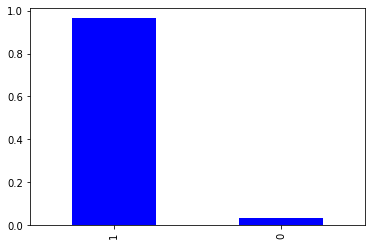

In [ ]:
data["예측 감성"].value_counts(normalize=True).plot(kind='bar', color = "blue")
print(data["예측 감성"].value_counts(normalize=True)*100)

1    93.850267
0     6.149733
Name: 실제 감성, dtype: float64


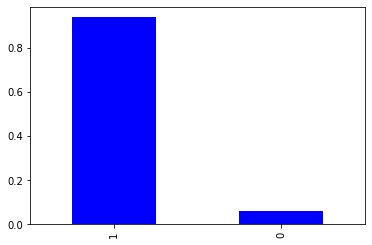

In [ ]:
data["실제 감성"].value_counts(normalize=True).plot(kind='bar', color = "blue")
print(data["실제 감성"].value_counts(normalize=True)*100)

## (5) 긍정 & 부정 키워드 분석

- 회귀 계수를 통한 긍정 & 부정 키워드 추출

In [ ]:
# Logistic Regression 모델에서 생성된 회귀계수 값
lr2.coef_

array([[ 0.28940794,  0.36662592,  0.05841978, ..., -0.20346209,
         0.14230125,  0.12855244]])

<BarContainer object of 1478 artists>

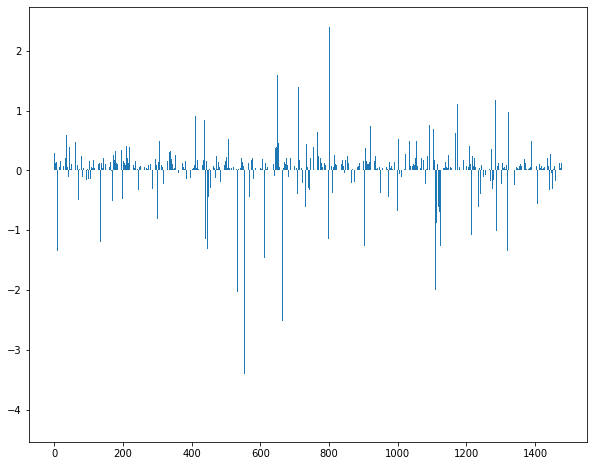

In [ ]:
# 회귀계수 값을 시각화
# 계수가 양인 경우는 긍정, 음인 경우는 부정
plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])

In [ ]:
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환
# 회귀계수 값 상/하위 5개 정렬
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])

[(2.4021649267304865, 801), (2.069068827574002, 658), (2.0688826014993156, 1274), (1.7625532514600422, 1163), (1.6476442325649632, 531)]
[(-2.8125023076701963, 1280), (-2.944515210469646, 607), (-3.4133802752331324, 554), (-3.7544561288784775, 838), (-4.209317352699301, 820)]


In [ ]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index

[(2.4021649267304865, 801),
 (2.069068827574002, 658),
 (2.0688826014993156, 1274),
 (1.7625532514600422, 1163),
 (1.6476442325649632, 531),
 (1.5870358651057959, 650),
 (1.50750605039603, 381),
 (1.3909040344829504, 711),
 (1.3426429765705625, 1344),
 (1.211975323301475, 130),
 (1.1823714905563742, 1266),
 (1.1701472476005137, 1285),
 (1.1308297210369924, 1137),
 (1.1153878870584812, 1174),
 (1.1006192351197046, 1059),
 (1.0660817179303337, 626),
 (1.0645674909956018, 933),
 (1.0359048396766997, 994),
 (1.0335791498042435, 993),
 (0.9752794252324233, 1323),
 (0.9561989689114683, 256),
 (0.9143137073931482, 1452),
 (0.9089869382470936, 411),
 (0.8923206224539013, 1385),
 (0.8771411887758936, 1073),
 (0.8603424872843972, 646),
 (0.853923410591055, 451),
 (0.8516936302362802, 631),
 (0.8400422933566822, 437),
 (0.8367318569778416, 1155),
 (0.8354986636952643, 89),
 (0.8102752935129298, 866),
 (0.7615490896086253, 1093),
 (0.738349009625368, 921),
 (0.7224893386004677, 827),
 (0.702382725

In [ ]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{531: '배달',
 626: '사장',
 187: '김치',
 639: '상태',
 1116: '점검',
 827: '어제',
 798: '약간',
 711: '스시',
 618: '사실',
 432: '먹기',
 1163: '주문',
 1371: '포장',
 1008: '이중',
 59: '거나',
 324: '동생',
 1266: '초밥',
 206: '나중',
 175: '기사',
 478: '문자',
 834: '언제',
 1187: '지난번',
 1401: '한번',
 658: '서비스',
 9: '가락국수',
 294: '대체',
 1274: '최고',
 801: '양도',
 1452: '회도',
 654: '생선회',
 675: '소고기',
 95: '고기',
 56: '개인',
 1281: '최애',
 649: '샐러드',
 130: '구성',
 100: '고민',
 381: '리뷰',
 746: '신청',
 797: '야채',
 173: '기본',
 671: '세트',
 1345: '특선',
 1169: '주신',
 1174: '죽도',
 440: '메밀',
 217: '남편',
 471: '무지',
 125: '교통',
 1055: '자마자',
 1271: '초파리',
 387: '마리',
 994: '이벤트',
 1380: '품목',
 245: '누락',
 1368: '평점',
 747: '실망',
 1353: '파리',
 468: '무시',
 170: '기대',
 413: '만큼',
 848: '여기저기',
 762: '쓰시',
 1130: '정착',
 1005: '이제',
 1057: '자연',
 437: '메뉴',
 1053: '자기',
 51: '개별',
 129: '구매',
 976: '음식',
 1155: '종종',
 424: '매우',
 39: '감안',
 576: '부족함',
 465: '무가',
 1: '가격',
 1124: '정도',
 107: '고추냉이',
 94: '고급',
 838: '얼음',
 1280: '최악'

In [ ]:
# 긍정 키워드 5개 출력
for coef in coef_pos_index[:5]:
    print(invert_index_vectorizer[coef[1]], coef[0]) 

양도 2.4021649267304865
서비스 2.069068827574002
최고 2.0688826014993156
주문 1.7625532514600422
배달 1.6476442325649632


In [ ]:
# 부정 키워드 5개 출력
for coef in coef_neg_index[:5]:
    print(invert_index_vectorizer[coef[1]], coef[0])

어묵 -4.209317352699301
얼음 -3.7544561288784775
별로 -3.4133802752331324
뻑뻑 -2.944515210469646
최악 -2.8125023076701963
